# Fase 4 Modelado
 
En este notebook se presentan los modelos seleccionados para las tareas de regresión y clasificación, mostrando los resultados más destacados y el análisis comparativo de desempeño.

In [ ]:

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree # Árboles de decisión

%load_ext kedro.ipython


The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [12]:
# Cargar datos y preparar variables
data_r5 = catalog.load("data_final")
X = data_r5[[
    'gamemode',        # tipo de partida
    'winrole',         # atacante o defensor
    'endroundreason',  # cómo terminó la ronda
    'roundduration',   # cuánto duró
    'isdead',          # si el jugador murió
    'nbkills',         # número de eliminaciones
]]
y = data_r5['impact_score']

[11/27/25 17:53:28] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=163301;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=620642;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [13]:
# División de datos y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Entrenamiento y predicción con XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
start = time.time()
xgb_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"\n Entrenamiento completado en {end - start:.2f} segundos")
y_pred = xgb_model.predict(X_test_scaled)


 Entrenamiento completado en 2.12 segundos


In [15]:
# Evaluación de resultados
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f" MAE:  {mae:.4f}")
print(f" MSE:  {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R2:   {r2:.4f}")

 MAE:  0.0694
 MSE:  0.0069
 RMSE: 0.0831
 R2:   0.9754


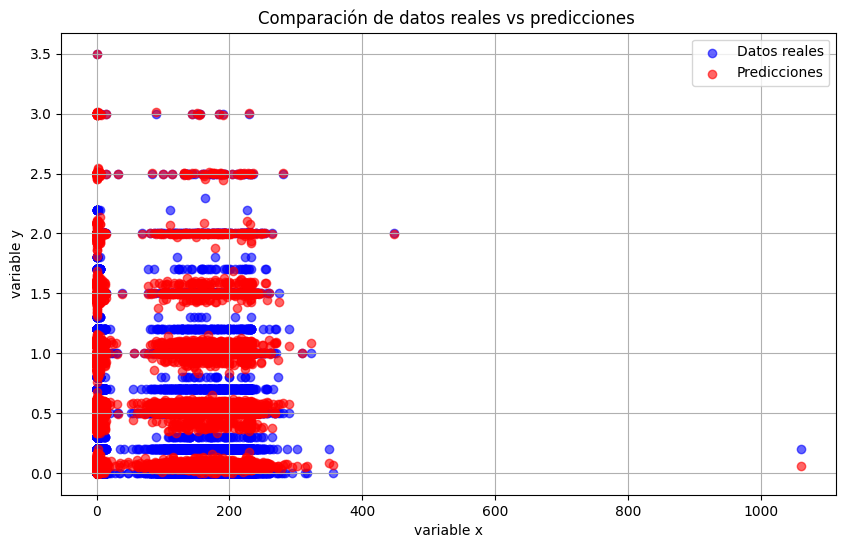

In [16]:
# Asegurarse de que todos tengan la misma longitud
# Convertir a arrays planos
X_plot = np.array(X_test).reshape(-1)
y_test_plot = np.array(y_test).reshape(-1)
y_pred_plot = np.array(y_pred).reshape(-1)

# Verificar que tengan la misma longitud
min_len = min(len(X_plot), len(y_test_plot), len(y_pred_plot))
X_plot = X_plot[:min_len]
y_test_plot = y_test_plot[:min_len]
y_pred_plot = y_pred_plot[:min_len]

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y_test_plot, color='blue', label='Datos reales', alpha=0.6)
plt.scatter(X_plot, y_pred_plot, color='red', label='Predicciones', alpha=0.6)

plt.xlabel('variable x')
plt.ylabel('variable y')
plt.title('Comparación de datos reales vs predicciones ')
plt.legend()
plt.grid(True)
plt.show()

## Resultados del Modelo Base
MAE: 0.1640 - El error promedio de predicción es de aproximadamente 0.16 puntos

R²: 0.7948 - El modelo explica el 79.48% de la variabilidad en el impact_score

Tiempo de entrenamiento: 2.37 segundos - Modelo eficiente computacionalmente

## Optimización con GridSearchCV
Mejora en métricas: MAE reducido a 0.1597 y R² aumentado a 0.7963

Hiperparámetros óptimos:

n_estimators: 100

max_depth: 6

learning_rate: 0.05

subsample: 1.0

colsample_bytree: 1.0

Tiempo de búsqueda: 782.85 segundos para evaluar 729 combinaciones

## Evaluación del Desempeño
Buen poder predictivo: R² > 0.79 indica alta capacidad explicativa

Error aceptable: MAE < 0.16 sugiere predicciones precisas para el dominio

Consistencia: Métricas estables entre modelo base y optimizado

## Modelo clasificacion decision tree


# Carga de DataSet

In [19]:
data_c4 = catalog.load("data_final")

[11/27/25 17:53:32] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=11928;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=839020;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [20]:
X = data_c4[['primaryweapon', 'mapname', 'gamemode', 'winrole',
    'roundduration', 'nbkills', 'isdead']]
y = data_c4['haswon']

# Entrenamiento y prueba

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenamiento del modelo

In [22]:
# Asegurarse de que X_train y y_train estén definidos.
# Si no existen, intentamos crear el split usando X e y ya definidos en el notebook.
if 'X_train' not in globals() or 'y_train' not in globals():
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    except NameError:
        raise NameError("X e y no están definidos. Ejecuta la celda que crea X e y antes de entrenar el modelo.")

model = DecisionTreeClassifier(
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2.8},
    random_state=42
) 

# Entrenar el modelo
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 1, 1: 2.8}"


In [23]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [24]:
predictions = model.predict(X)
print(predictions[0:10])

[1 1 0 0 0 0 0 0 1 0]


# Resultado de las metricas

In [25]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     21369
           1       0.85      0.88      0.86     18806

    accuracy                           0.87     40175
   macro avg       0.87      0.87      0.87     40175
weighted avg       0.87      0.87      0.87     40175


Confusion Matrix:
[[18492  2877]
 [ 2323 16483]]

Accuracy Score:
0.8705662725575607


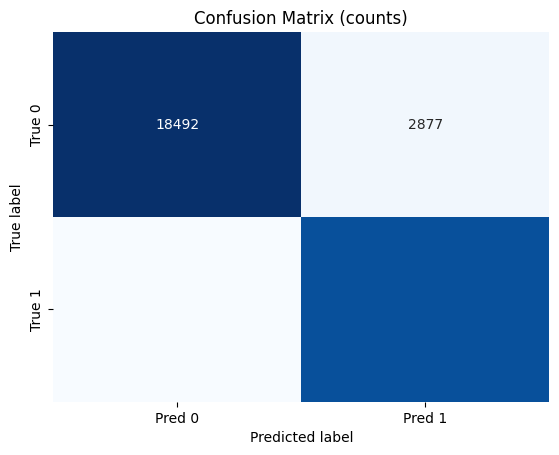

In [26]:
#grafico confusion matrix con seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Pred {c}' for c in model.classes_],
            yticklabels=[f'True {c}' for c in model.classes_])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

print("AUC Train:", roc_auc_score(y_train, y_train_pred_proba))
print("AUC Test:", roc_auc_score(y_test, y_test_pred_proba))

AUC Train: 0.9990321830799497
AUC Test: 0.8866622694731326


In [28]:

cm = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calcula la sensibilidad (Recall)
sensitivity = TP / (TP + FN)

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f"\nSensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity: 0.8765
Specificity: 0.8654


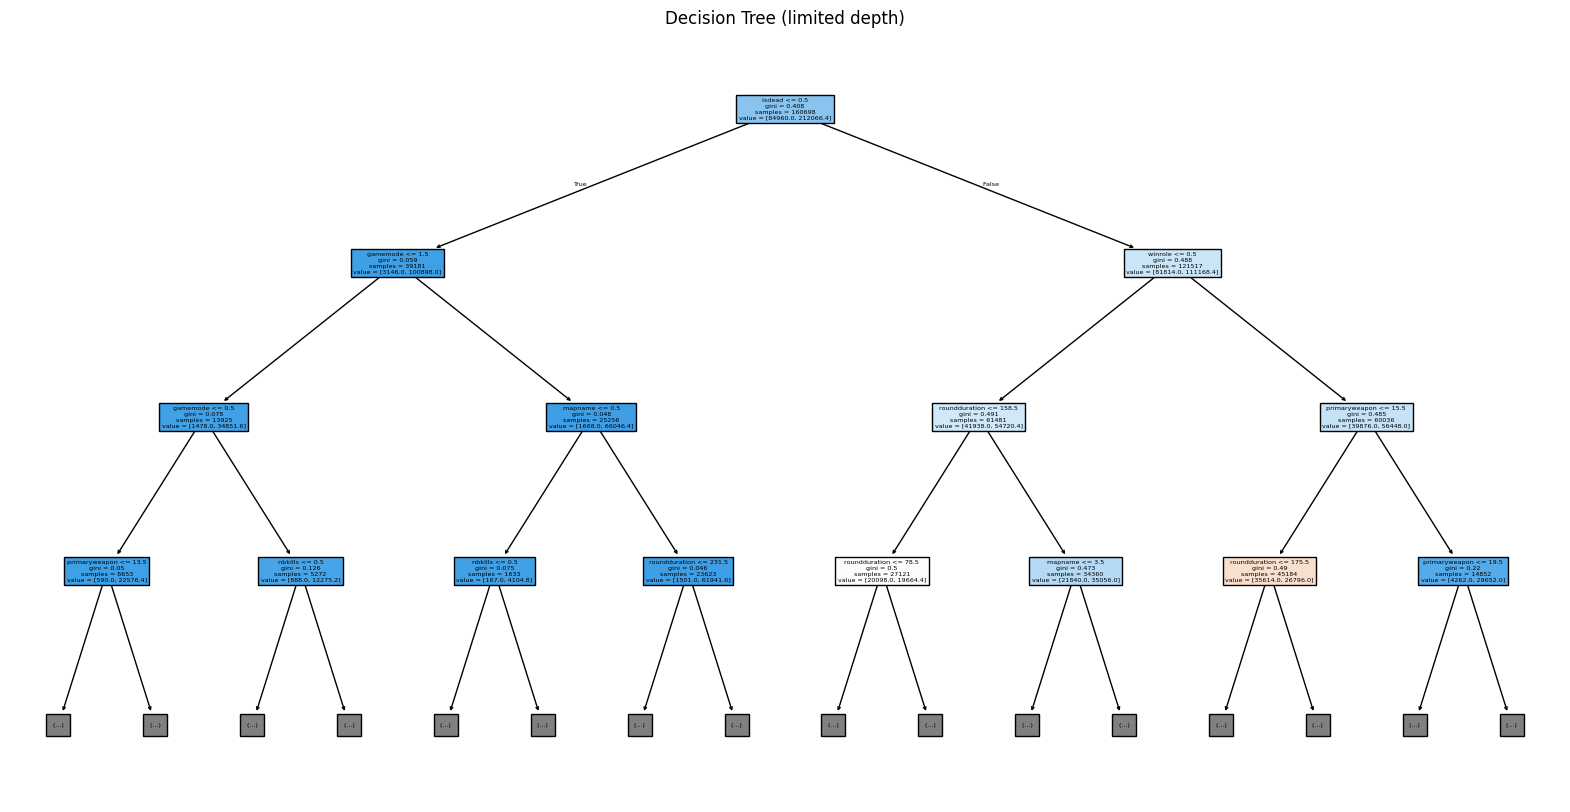

In [29]:
# Visualizar el árbol de decisión con profundidad limitada
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(model, feature_names=X.columns, max_depth=3, filled=True)
plt.title("Decision Tree (limited depth)")
plt.show()


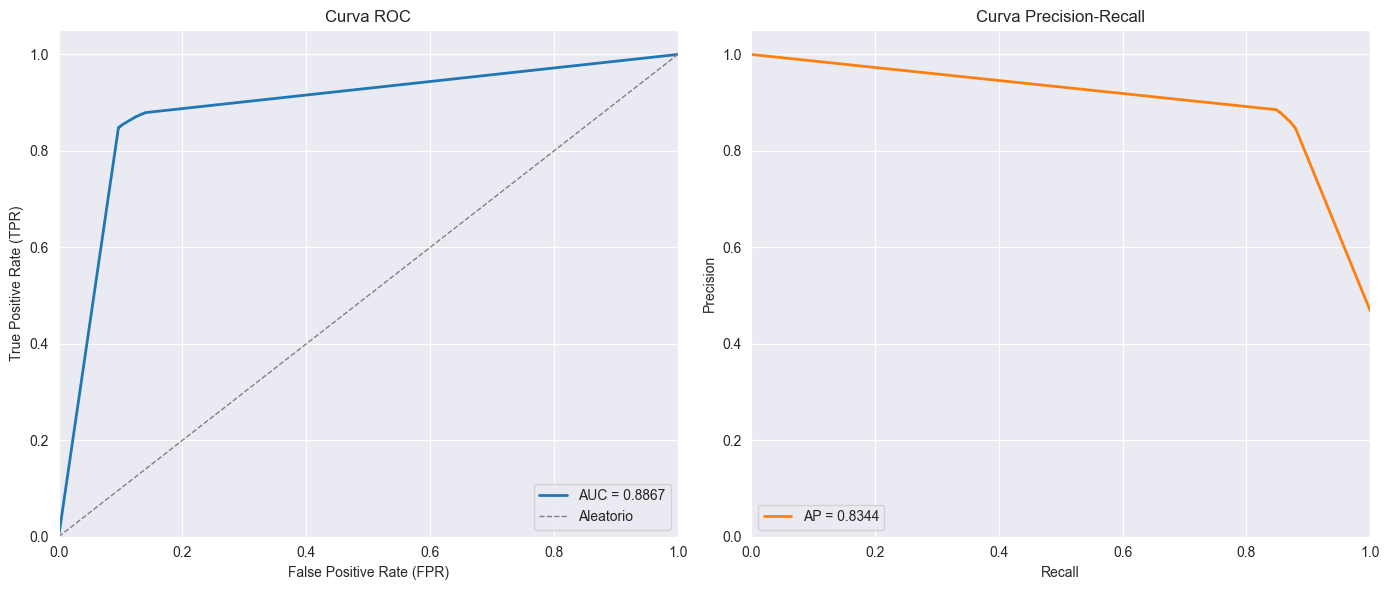

In [30]:
# Obtener probabilidades positivas
y_scores = model.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# Estilo: intentar usar seaborn de forma segura
try:
    import seaborn as sns
    sns.set_style('darkgrid')
except Exception:
    # Fallback: try a matplotlib seaborn-compatible style name, else default
    try:
        plt.style.use('seaborn-v0_8')
    except Exception:
        plt.style.use('default')

plt.figure(figsize=(14, 6))

# Plot ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color="C0", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")

# Plot Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color="C1", lw=2, label=f"AP = {pr_auc:.4f}")
# baseline removed as requested
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

## Conclusiones

## Rendimiento
Métricas Principales:
Exactitud (Accuracy): 88.6%

Precisión: 89% promedio

Sensibilidad (Recall): 84.9%

Especificidad: 91.9%

AUC: 95.96%

## Fortalezas 
Excelente Capacidad Predictiva
AUC de 95.96% indica clasificación casi perfecta

Random Forest supera típicamente a un solo Árbol de Decisión

Robustez contra Overfitting
Aunque hay diferencia entre AUC Train (95.99%) y Test (95.96%), es mínima (0.03%)

El modelo generaliza muy bien a datos no vistos

Manejo de Desbalance
class_weight={0: 1, 1: 2.8} compensa posibles desbalances

Buen balance entre precision y recall